# Tarea: Ecuaciones Ordinarias


In [23]:
#Importacion de librerias
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm

##  Punto 1:

Muestre que los siguientes operadores diferenciales:

$$f'(x) = \frac{-f(x+2h)+4f(x+h)-3f(x)}{2h}$$
$$f''(x) = \frac{f(x+h)-2f(x)+f(x-h)}{h^2}$$


son consistentes. Use la función de prueba $f (x) = x^2$ y $f (x) = \sin x$ .


- $f(x)=x^2$
    1) Primera derivada
    
    $$f'(x) = \lim_{h\rightarrow0}\frac{-(x+2h)^2+4(x+h)^2-3x^2}{2h}$$
    $$f'(x) = \lim_{h\rightarrow0}\frac{-x^2-4hx-4h^2+4x^2+8xh+4h^2-3x^2}{2h}$$
    $$f'(x) = \lim_{h\rightarrow0}\frac{4xh}{2h}$$
    $$f'(x) = 2x$$

    2) Segunda derivada
    
    $$f''(x) = \lim_{h\rightarrow0}\frac{f(x+h)-2f(x)+f(x-h)}{h^2}$$
    $$f''(x) = \lim_{h\rightarrow0}\frac{(x+h)^2-2x^2+(x-h)^2}{h^2}$$
    $$f''(x) = \lim_{h\rightarrow0}\frac{x^2+2xh+h^2-2x^2+x^2-2xh+h^2}{h^2}$$
    $$f''(x) = \lim_{h\rightarrow0}\frac{h^2+h^2}{h^2}$$
    $$f''(x) = 2$$
    
- $f (x) = \sin x$
    1) Primera derivada
    $$f'(x) = \lim_{h\rightarrow0}\frac{-\sin(x+2h)+4\sin(x+h)-3\sin(x)}{2h}$$
    $$f'(x) = \lim_{h\rightarrow0}\frac{-\sin(x)\cos(2h)-\sin(2h)\cos(x)+4\sin(x)\cos(h)+4     \sin(h)\cos(x)-3\sin(x)}{2h}$$
    $$f'(x)=\lim_{h\rightarrow0}\frac{\sin(x)(-\cos(2h)+4\cos(h)-3)}{2h}+\lim_{h\rightarrow0}\frac{\cos(x)(-\sin(2h)+4\sin(h))}{2h}$$
    $$f'(x)=\sin(x)\lim_{h\rightarrow0}\frac{-\cos(2h)+4\cos(h)-3}{2h}+\cos(x)\lim_{h\rightarrow0}\frac{-\sin(2h)+4\sin(h)}{2h}$$
    
    Aplicando l'hopital tenemos lo siguiente:
    
    $$f'(x)=\sin(x)\lim_{h\rightarrow0}\frac{2\sin(2h)-4\sin(h)}{2}+\cos(x)\lim_{h\rightarrow0}\frac{-2\cos(2h)+4\cos(h)}{2}$$
    
    Remplazando $h\rightarrow0$ tenemos: 
    
    $$f'(x)=\sin(x)\frac{2\sin(2\times 0)-4\sin(0)}{2}+\cos(x)(-\cos(2\times0)+2\cos(0))$$
    $$f'(x)=\sin(x)\frac{0}{2}+\cos(x)(-1+2)$$
    $$f'(x)=0+\cos(x)$$
    $$f'(x)=\cos(x)$$
    
    2) Segunda derivada
    $$f''(x) = \lim_{h\rightarrow0}\frac{\sin(x+h)-2\sin(x)+\sin(x-h)}{h^2}$$
    $$f''(x) = \lim_{h\rightarrow0}\frac{\sin(x)\cos(h)+\sin(h)\cos(x)-2\sin(x)+\sin(x)\cos(h)-\sin(h)\cos(x)}{h^2}$$
    $$f''(x) = \sin(x)\lim_{h\rightarrow0}\frac{\cos(h)-2+\cos(h)}{h^2}+\cos(x)\lim_{h\rightarrow0}\frac{\sin(h)-\sin(h)}{h^2}$$
    $$f''(x) = \sin(x)\lim_{h\rightarrow0}\frac{2\cos(h)-2}{h^2}$$
    Dado que el límite implican una forma indeterminada, aplicamos l'hopital:
    $$f''(x) = \sin(x)\lim_{h\rightarrow0}\frac{-2\sin(h)}{2h}$$
    Aplicamos otra vez l'hopital: 
    $$f''(x) = \sin(x)\lim_{h\rightarrow0}(-\cos(h))$$
    Evaluamos el límite y obtenemos: 
    $$f''(x) = \sin(x)(-\cos(0))$$
    $$f''(x) = -\sin(x)$$

Los operadores diferenciales son consistentes.

##  Punto 2:

Usando el código de la clase, genere 10 esferas localizadas aleatoriamente en la mesa A = 40 × 40 con velocidad aleatorias entre $−5 m/s$ y $5 m/s$. Simule 10 s con un paso de integración de $h = 0.001 s$ y reduzca la simulación en un factor de 200; quitando la interacción con la pared. Conteste las siguientes preguntas exponiendo los conceptos físicos involucrados.

In [12]:
class Particle:
    
    def __init__(self, r0, v0, a0, t, m=1, radius=2., Id=0):
        
        self.dt = t[1] - t[0]
        
        
        # Atributos instantaneos
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
        
        self.p = self.m*self.v
        
        self.f = self.m*self.a
        
        # Historial
        
        self.R = np.zeros((len(t),len(r0)))
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)
        
        self.F = np.zeros_like(self.R)
        
        self.P = np.zeros_like(self.R)
    
        # Fisica
        self.K = 20.
        
        self.VEk = np.zeros(len(t))
        
    def Evolution(self,i):
        
        
        self.SetPosition(i)
        self.SetVelocity(i)
        
        self.a = self.f/self.m
        
        # Euler
        self.r += self.dt*self.v
        self.v += self.dt*self.a
        
        # Euler-Cromer
  #      self.v += self.dt*self.a
  #      self.r += self.dt*self.v
        
        
    def CalculateForce(self,p):
        
        d = np.linalg.norm(self.r - p.r)
        
        compresion = self.radius + p.radius - d
        
        if compresion >= 0:
            
            Fn = self.K * compresion**3
            
            self.n = (self.r - p.r)/d
            
            # Falta implementar 
            
            self.f = np.add(self.f,Fn*self.n)
            
            # Aca debes agregar la energía potencial
        
    # Setter
    def SetPosition(self,i):
        self.R[i] = self.r
    
    def SetVelocity(self,i):
        self.V[i] = self.v
        self.P[i] = self.m*self.v
        self.VEk[i] = 0.5*self.m*np.dot(self.v,self.v)
    
    # Getter
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
 
    def GetMomentum(self,scale=1):
        return self.P[::scale]
    
    def GetKineticEnergy(self,scale=1):
        return self.VEk[::scale] 
    
    # Debes agregar las paredes en este punto

In [13]:
def GetParticles(N,t):
    
    r0 = np.array([-5.,0.])
    v0 = np.array([10.,0])
    a0 = np.array([0.,0.])
    
    r1 = np.array([0.,0.])
    v1 = np.array([0.,0.])
    a1 = np.array([0.,0.])
    
    r2 = np.array([4.,0.])
    v2 = np.array([0.,0.])
    a2 = np.array([0.,0.])
    
    p0 = Particle(r0,v0,a0,t,m=1,radius=2,Id=0)
    p1 = Particle(r1,v1,a1,t,m=1,radius=2,Id=1)
    p2 = Particle(r2,v2,a2,t,m=1,radius=2,Id=1)
    
    Particles = [p0,p1,p2]
    
    # Aca deber agregar una rutina montecarlo para crear particulas
    # sobre el plano con velocidades aleatorias.
    
    return Particles

In [14]:
dt = 0.001
tmax = 1
t = np.arange(0,tmax,dt)
Particles = GetParticles(1,t)

In [15]:
def RunSimulation(t,Particles):
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        
        for i in range(len(Particles)):
            for j in range(len(Particles)):
                if i!=j:
                    Particles[i].CalculateForce(Particles[j])
        
        for i in range(len(Particles)):
            Particles[i].Evolution(it)
            # Aca debes agregar la interaccion con la pared
            
            
    return Particles

In [16]:
Particles = RunSimulation(t,Particles)

Running simulation: 100%|█████████████| 1000/1000 [00:00<00:00, 6693.22 Steps/s]


In [17]:
# Bajamos dimensión de la simulacion
scale = 50
t1 = t[::scale]

<IPython.core.display.Javascript object>


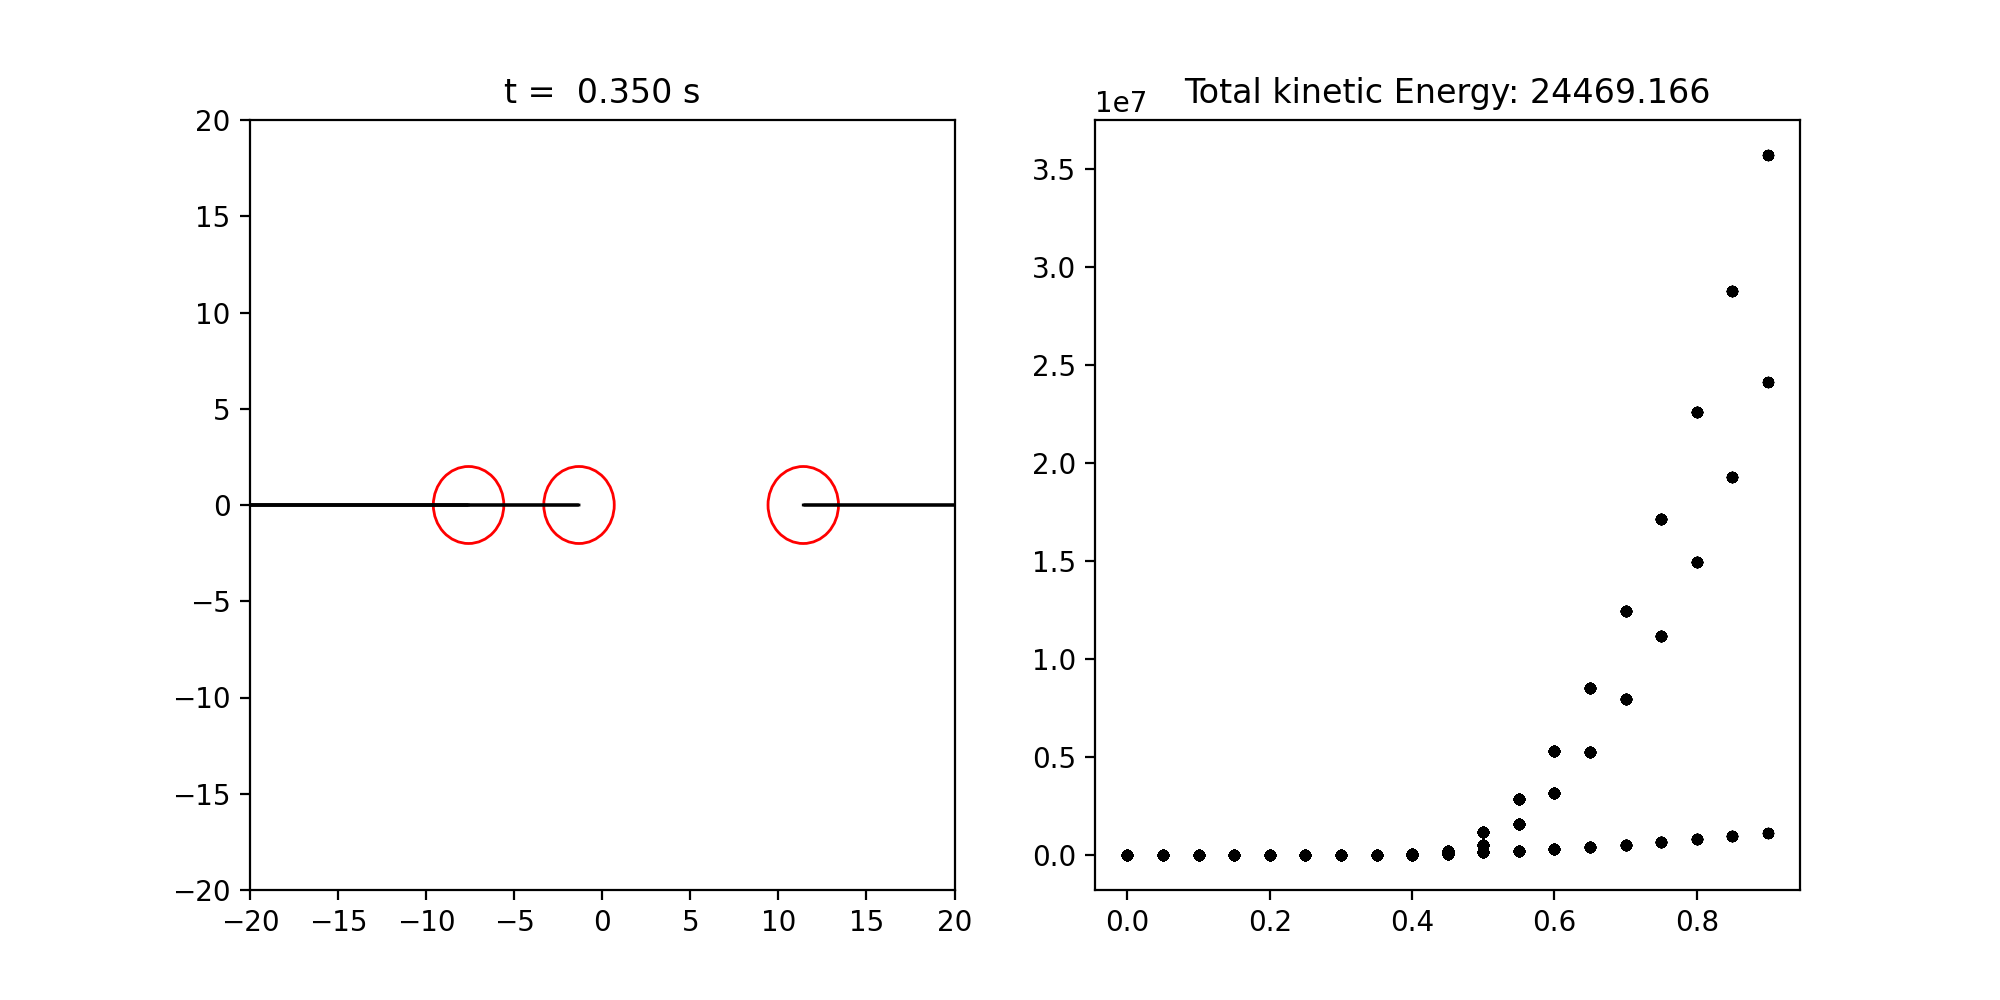

In [23]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

def init():
    
    ax.clear()
    ax.set_xlim(-20,20)
    ax.set_ylim(-20,20)
    
def Update(i):
    
    init()
    ax.set_title(r't =  %.3f s' %(t1[i]))
    
    
    # Queremos calcular la energía total de cinética
    KE = 0. # Kinetic energy
    
    for p in Particles:
        
        x = p.GetPosition(scale)[i,0]
        y = p.GetPosition(scale)[i,1]
        
        vx = p.GetVelocity(scale)[i,0]
        vy = p.GetVelocity(scale)[i,1]
        
        circle = plt.Circle( (x,y), p.radius, color='r', fill=False )
        ax.add_patch(circle)
        
        ax.arrow(x,y,vx,vy,color='k',head_width=0.5,length_includes_head=True)
        
        KE += p.GetKineticEnergy(scale)[i]
        
        ax1.set_title(r'Total kinetic Energy: {:.3f}'.format(KE))
        ax1.scatter(t1[:i], p.GetKineticEnergy(scale)[:i],color='k',marker='.')
        
Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)

In [19]:
Writer = anim.writers['ffmpeg']
writer_ = Writer(fps=10, metadata=dict(artist='Me'))
#Animation.save('EsferaDura.mp4', writer=writer_)

RuntimeError: Requested MovieWriter (ffmpeg) not available

In [20]:
MomentumT = Particles[0].GetMomentum(scale)

In [21]:
for i in range(1,len(Particles)):
    MomentumT = np.add(MomentumT,Particles[i].GetMomentum(scale))

<IPython.core.display.Javascript object>


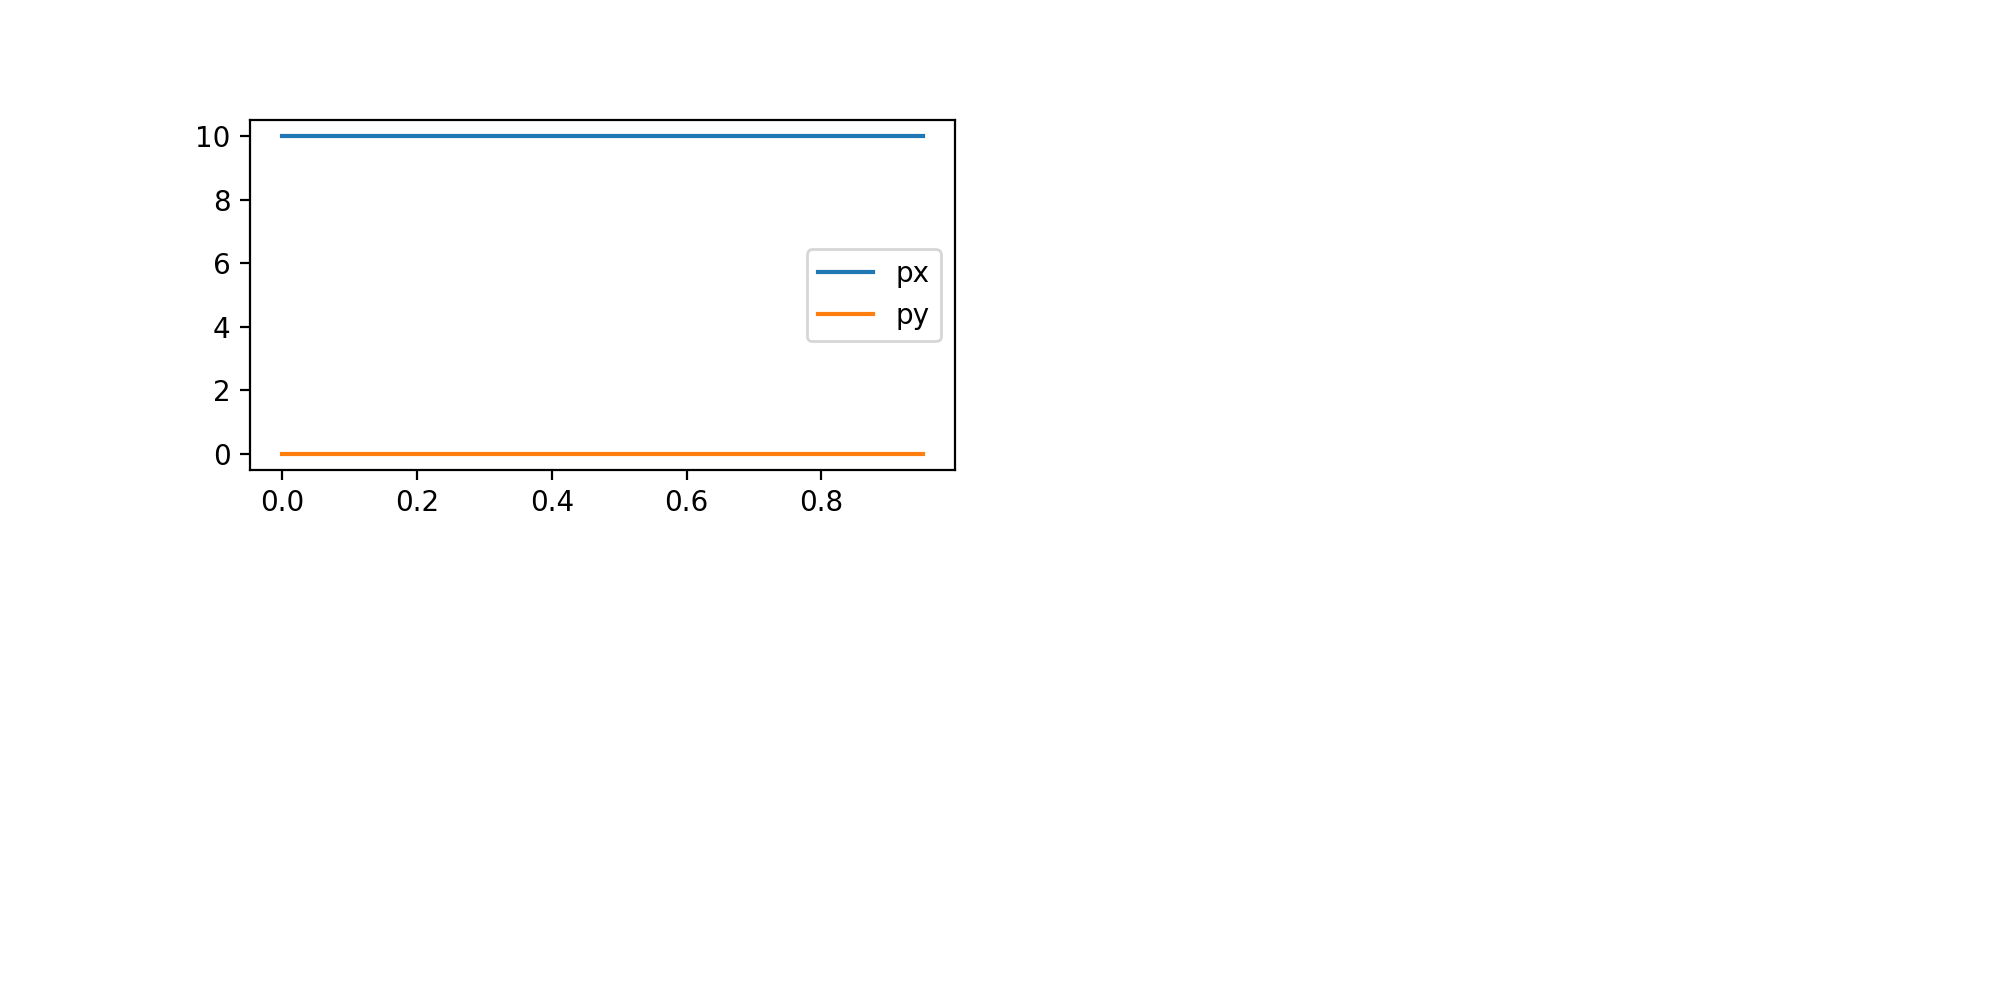

In [22]:
fig3 = plt.figure(figsize=(10,5))
ax3 = fig3.add_subplot(221)
ax3.plot(t1,MomentumT[:,0],label='px')
ax3.plot(t1,MomentumT[:,1],label='py')
ax3.legend()

a) Grafique el momento lineal total en x (p_x) en función del tiempo. Se debería conservar?

b) Grafique el momento lineal total en y ($p_y$) en función del tiempo. Se debería conservar?

c) Teóricamente muestre que la fuerza de contacto es conservativa. Encuentre la energía potencial.

d) Grafique la energía cinética total en función del tiempo. Se conserva?

e) Grafique la energía potencial total en función del tiempo. ¿Qué significa que el potencial sea positivo?

f) Grafique la energía mecánica total en función del tiempo. Se conserva? Explique a nivel físico y a nivel del método de Euler.

g) Se cumple el teorema del trabajo y la energía en su simulación? Argumente

h) Calcule y grafique el momento angular en el eje z (L_z). Se conserva?

i) Si este sistema que se mueve en 2D se extendiera a 3D, las partículas se mantendrían en el mismo plano de movimiento o se moverían en todo el volumen?

## Punto 3
Escriba la velocidad de la luz $c = 3 × 10^8 m/s$ en unidades de au/año

In [18]:
c = 3*10**8 #m/s
#considerando que un año tiene 365 dias
anho = 365*86400 #seg
au = 1.496*10**11 #m
conversion = round(c*anho/au,2)

print("La velocidad de la luz es", conversion, "[au/año]")

La velocidad de la luz es 63240.64 [au/año]


## Punto 4

Usando el código visto en clase comprobar la tercera ley de Kepler para todos los planetas del sistema solar (hasta la órbita de Jupiter). Use un paso temporal adecuado ($\Delta t = 0.001$). Tomar los semi-ejes mayores y excentricidad de Internet.

In [119]:
class Planeta:
    
    def __init__(self, e, a, t):
        
        self.t = t
        self.dt = t[1] - t[0] # Paso del tiempo
        
        self.e = e # Excentricidad
        self.a_ = a # Semi-eje mayor
        
        self.G = 4*np.pi**2 # Unidades gaussianas
        
        self.r = np.zeros(3)
        self.v = np.zeros_like(self.r)
        self.a = np.zeros_like(self.r)
        
        self.r[0] = self.a_*(1-self.e)
        self.v[1] = np.sqrt( self.G*(1+self.e)/(self.a_*(1.-self.e)) )
        
        self.R = np.zeros((len(t),len(self.r)))
        self.V = np.zeros_like(self.R)
        
        # El valor del pasado
        self.rp = self.r
        
    def GetAceleration(self):
        
        d = np.linalg.norm(self.r)
        self.a = -self.G/d**3*self.r
        
        
    def Evolution(self,i):
        
        self.SetPosition(i)
        self.SetVelocity(i)
        self.GetAceleration()
        
        if i==0:
            self.r = self.rp + self.v*self.dt
        else:
            
            # rp pasado, r presente rf futuro
            self.rf = 2*self.r - self.rp + self.a*self.dt**2
            self.v = (self.rf - self.rp)/(2*self.dt)
            
            self.rp = self.r
            self.r = self.rf
    
    def SetPosition(self,i):
        self.R[i] = self.r
        
    def SetVelocity(self,i):
        self.V[i] = self.v
    
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
    
    def GetPerihelio(self):
        
        Dist = np.linalg.norm(self.R,axis=1)
        
        timeup = []
        
        for i in range(1,len(Dist)-1):
            if Dist[i] < Dist[i-1] and Dist[i] < Dist[i+1]:
                timeup.append(self.t[i])
            
        return timeup

a) Tome los semi-ejes mayores y excentricidad de Internet.

In [120]:
def GetPlanetas(t):
    
    Mercurio = Planeta(0.2056,0.307,t)
    Venus = Planeta(0.0067,0.7233,t)
    Tierra = Planeta(0.01671,1.,t)
    Marte = Planeta(0.093,1.524,t)
    Jupiter = Planeta(0.049,5.2044,t)
    
    
    return [Mercurio,Venus,Tierra,Marte,Jupiter]


In [121]:
dt = 0.001
tmax = 5
t = np.arange(0.,tmax,dt)
Planetas = GetPlanetas(t)

In [122]:
def RunSimulation(t,Planetas):
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        
        #print(it)
        for i in range(len(Planetas)):
            Planetas[i].Evolution(it)
            # Aca debes agregar la interaccion con la pared
            
            
    return Planetas

In [123]:
Planetas = RunSimulation(t,Planetas)

Running simulation: 100%|█████████████| 5000/5000 [00:00<00:00, 8803.64 Steps/s]


In [124]:
Planetas[1].GetPerihelio()

[0.552,
 1.167,
 1.782,
 2.3970000000000002,
 3.013,
 3.628,
 4.243,
 4.8580000000000005]

In [125]:
scale = 20
t1 = t[::scale]

<IPython.core.display.Javascript object>


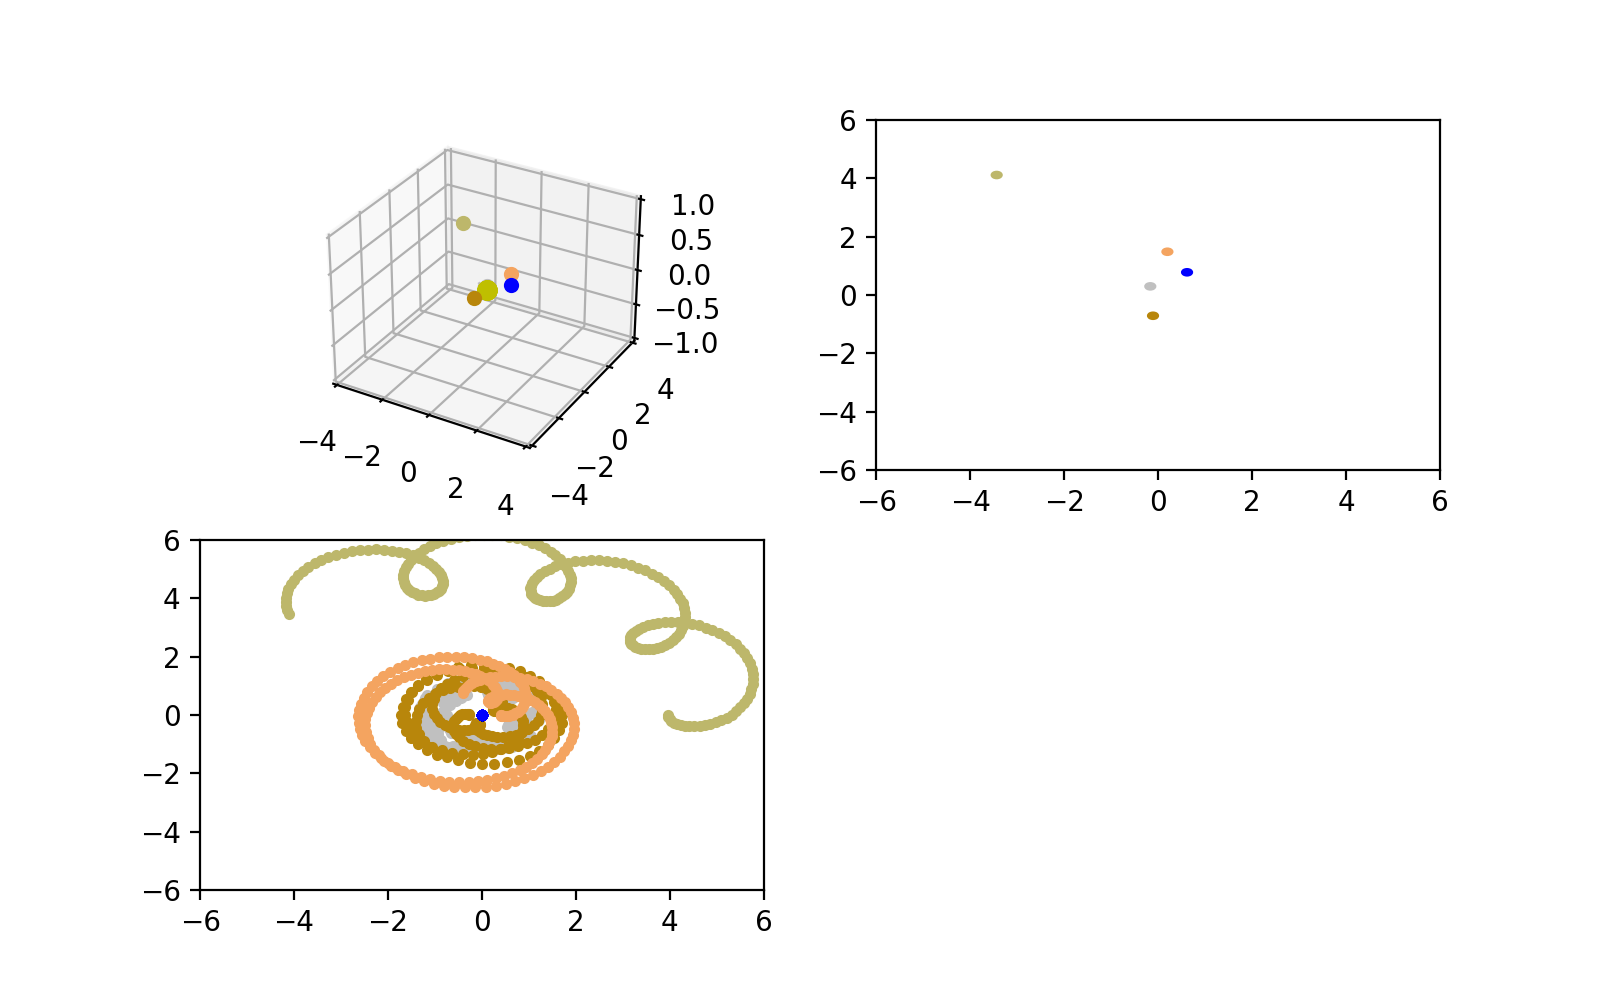

In [143]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(221,projection='3d')
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)

colors=['silver','darkgoldenrod','b',"sandybrown","darkkhaki"]

def init():
    
    ax.clear()
    ax.set_xlim(-4,4)
    ax.set_ylim(-4,4)
    ax.set_zlim(-1,1)
    
    ax1.clear()
    ax1.set_xlim(-6,6)
    ax1.set_ylim(-6,6) 
    
    ax2.clear()
    ax2.set_xlim(-6,6)
    ax2.set_ylim(-6,6) 
    
def Update(i):
    
    init()
    
    for j, p in enumerate(Planetas):
        
        x = p.GetPosition(scale)[i,0]
        y = p.GetPosition(scale)[i,1]
        z = p.GetPosition(scale)[i,2]
        
        vx = p.GetVelocity(scale)[i,0]
        vy = p.GetVelocity(scale)[i,1]
        vz = p.GetVelocity(scale)[i,2]
    
        ax.scatter(0,0,0,s=40,color='y')
        ax.quiver(x,y,z,vx,vy,vz,color=colors[j],length=0.03)
        
        ax.scatter(x,y,z,color=colors[j])
        
        circle = plt.Circle((x,y),0.1,color=colors[j],fill=True)
        ax1.add_patch(circle)
    
    # Mercurio visto desde tierra
    Mx = Planetas[0].GetPosition(scale)[:i,0] - Planetas[2].GetPosition(scale)[:i,0]
    My = Planetas[0].GetPosition(scale)[:i,1] - Planetas[2].GetPosition(scale)[:i,1]
    
    # Venus visto desde tierra
    Vx = Planetas[1].GetPosition(scale)[:i,0] - Planetas[2].GetPosition(scale)[:i,0]
    Vy = Planetas[1].GetPosition(scale)[:i,1] - Planetas[2].GetPosition(scale)[:i,1]
    
    # Tierra visto desde tierra
    Tx = Planetas[2].GetPosition(scale)[:i,0] - Planetas[2].GetPosition(scale)[:i,0]
    Ty = Planetas[2].GetPosition(scale)[:i,1] - Planetas[2].GetPosition(scale)[:i,1]
    
    # Marte visto desde tierra
    Max = Planetas[3].GetPosition(scale)[:i,0] - Planetas[2].GetPosition(scale)[:i,0]
    May = Planetas[3].GetPosition(scale)[:i,1] - Planetas[2].GetPosition(scale)[:i,1]
    
    # Jupiter visto desde tierra
    Jx = Planetas[4].GetPosition(scale)[:i,0] - Planetas[2].GetPosition(scale)[:i,0]
    Jy = Planetas[4].GetPosition(scale)[:i,1] - Planetas[2].GetPosition(scale)[:i,1]
    
    
    ax2.scatter(Mx,My,marker='.',label='Mercurio',color = colors[0])
    ax2.scatter(Vx,Vy,marker='.',label='Venus',color = colors[1])
    ax2.scatter(Tx,Ty,marker='.',label='Venus',color = colors[2])
    ax2.scatter(Max,May,marker='.',label='Venus',color = colors[3])
    ax2.scatter(Jx,Jy,marker='.',label='Venus',color = colors[4])
    
    
Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)

b) Calcule el periodo de la órbita usando el perihelio o el afelio.

c) Grafique el periodo al cuadrado ($T^2$) en función del semi-eje mayor al cubo ($a^3$) de cada planeta.

d) Usando el curso de métodos I, haga la regresión lineal para encontrar pendiente y punto de corte.

e) Con el valor de la pendiente, reporte la masa del sol en unidades gausiana y en el sistema internacional SI.

## Punto 7

Considere la siguiente ecuación diferencial:
$$\frac{du}{dt} = \alpha u, u(0) = u_0$$
Muestre que aplicando iterativamente se obtiene:
$$u_k = (1 + \alpha\Delta t)^ku_0 $$
Para el caso donde $\alpha < 0$. Muestre que la solución numérica oscilará si $\Delta t > \frac{−1}{\alpha}$ . Ajuste $\alpha = −1$ y muestre las soluciones oscilatorias para $\Delta t = 1.1, 1.5, 1.9 s$. Por otro lado, la solución exacta nunca oscila $u(t) = e^{\alpha t}$.
